In [82]:
!pip install moexalgo

In [83]:
import pandas as pd
from moexalgo import Market, Ticker

In [ ]:
df = pd.read_csv('data/ListingSecurityList.csv', engine='python', encoding='cp1251', sep=';')

In [ ]:
df.columns

In [ ]:
df = df[['TRADE_CODE','EMITENT_FULL_NAME','INSTRUMENT_TYPE', 'LIST_SECTION', 'INSTRUMENT_CATEGORY','CURRENCY','NOMINAL','ISSUE_AMOUNT']]

In [ ]:
df['TRADE_CODE'][11]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df = df[(df['INSTRUMENT_TYPE'] == 'Акция обыкновенная') | (df['INSTRUMENT_TYPE'] == 'Акции иностранного эмитента')]

In [ ]:
# Акции SBER
sber = Ticker('POLY')

# Все акции
stocks = Market('stocks')

In [ ]:
# Свечи по акциям SBER за период
sber.candles(date='2023-10-10', till_date='2023-10-18', period='10m').head()

In [ ]:
DATE_START = '2023-01-01'
DATE_END = '2023-01-02'

In [ ]:
sber.tradestats(date='2023-01-01', till_date='2023-01-02').head()

In [ ]:
# Данные по акциям SBER за период
sber.tradestats(date=DATE_START, till_date=DATE_END).head()

In [ ]:
df_poly.info()

In [ ]:
# Данные по всем акциям за дату. Чтобы получить данные за период, нужно запустить цикл по датам
stocks.tradestats(date='2023-10-10')['ticker'].unique().tolist()

In [ ]:
df = pd.read_csv('tradestats_CBOM.csv', engine='python', encoding='cp1251', sep=',')

In [ ]:
from matplotlib import pyplot as plt   
   
x = df[df['tradedate']=='2023-10-02']['tradetime']   
y = df[df['tradedate']=='2023-10-02']['pr_close']   
   
plt.plot(x,y)   
   
plt.title("Line graph")   
plt.ylabel('pr_close')   
plt.xlabel('tradetime')   
plt.show()   

In [ ]:
x = df[df['tradedate']=='2023-10-02']['tradetime']   
y = df[df['tradedate']=='2023-10-02']['trades']   
   
plt.plot(x,y)   
   
plt.title("Line graph")   
plt.ylabel('pr_close')   
plt.xlabel('trades')   
plt.show()   

In [ ]:
df.columns

In [ ]:
df.sort_values(by='tradetime', ascending=True)

In [ ]:
df['tradedate']

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df = pd.read_csv('tradestats_CBOM.csv', engine='python', encoding='cp1251', sep=',')

In [ ]:
df.loc[:,'trade_datetime'] = pd.to_datetime(df.tradedate.astype(str)+' '+df.tradetime.astype(str))

df = df[['trade_datetime', 'pr_open', 'pr_high', 'pr_low', 'vol', 'val', 'trades','trades_b', 'trades_s', 'val_b', 'val_s', 'vol_b', 'vol_s','pr_close']]

df.columns = ['trade_datetime', 'pr_open', 'pr_high', 'pr_low', 'vol', 'val', 'trades','trades_b', 'trades_s', 'val_b', 'val_s', 'vol_b', 'vol_s','target']

df["segment"] = "main"

df_etna = df


In [ ]:
df_etna.info()

In [ ]:
!python -V 

In [ ]:
!pip install --upgrade pip
!pip install etna
!pip install 'etna[all]'

In [ ]:
from etna.datasets.tsdataset import TSDataset

In [3]:
df = pd.read_csv('tradestats_CBOM.csv', engine='python', encoding='cp1251', sep=',')

In [5]:
df.iloc[-2:]

,tradedate,tradetime,secid,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,SYSTIME
724,2023-10-10,18:35:00,CBOM,7.016,7.018,7.012,7.012,0.0004,42,29456,...,4,4,21042,8414,30,12,0.43,7.014,7.012,2023-10-26 15:45:39
725,2023-10-10,18:40:00,CBOM,7.012,7.012,7.012,7.012,NaN,3,2103,...,0,1,0,2103,0,3,-1.00,NaN,7.012,2023-10-26 15:45:39


In [14]:
import pandas as pd

# Создание DataFrame (замените эту часть кода вашим собственным способом получения DataFrame)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Price': [100, 150, 130, 200, 180]
}
df = pd.DataFrame(data)

# Рассчет EMA по значениям цены актива
ema = df['Price'].ewm(span=2, adjust=False).mean()

# Считаем DEMA от этого индикатора
dema = 2 * ema - ema.ewm(span=2, adjust=False).mean()

# Рассчет индикатора = ( 2 х EMA ) — DEMA
indicator = 2 * ema - dema

df['DEMA'] = indicator  # добавление DEMA в DataFrame

print(df)

         Date  Price        DEMA
0  2023-01-01    100  100.000000
1  2023-01-02    150  122.222222
2  2023-01-03    130  128.148148
3  2023-01-04    200  160.740741
4  2023-01-05    180  172.921811


In [15]:
print(ema)

0    100.000000
1    133.333333
2    131.111111
3    177.037037
4    179.012346
Name: Price, dtype: float64


In [8]:
df['50-Day-SMA'] = df['pr_close'].rolling(window=50).mean()

In [11]:
df['50-Day-SMA'].unique()

array([    nan, 7.07614, 7.0771 , 7.07798, 7.07896, 7.07978, 7.08052,
       7.08094, 7.08116, 7.0813 , 7.08166, 7.082  , 7.0824 , 7.08272,
       7.08308, 7.08366, 7.08418, 7.08468, 7.08532, 7.08626, 7.08698,
       7.08766, 7.08836, 7.08912, 7.08954, 7.08996, 7.09026, 7.09054,
       7.09084, 7.09112, 7.09132, 7.09154, 7.0916 , 7.09176, 7.0919 ,
       7.09202, 7.09214, 7.09212, 7.09196, 7.09224, 7.09232, 7.09234,
       7.0924 , 7.0919 , 7.09128, 7.09066, 7.08966, 7.08848, 7.08722,
       7.0859 , 7.08458, 7.0832 , 7.0817 , 7.08034, 7.07822, 7.07652,
       7.07466, 7.07262, 7.0705 , 7.06856, 7.06646, 7.06408, 7.06146,
       7.05906, 7.05668, 7.05434, 7.05204, 7.04956, 7.04728, 7.04522,
       7.04334, 7.04132, 7.03942, 7.03756, 7.03532, 7.03326, 7.03122,
       7.02916, 7.02722, 7.02506, 7.02318, 7.02132, 7.01938, 7.01742,
       7.0153 , 7.01314, 7.01116, 7.00932, 7.00726, 7.00512, 7.00304,
       7.00084, 6.99854, 6.99662, 6.99462, 6.99258, 6.9909 , 6.98952,
       6.98804, 6.98

In [10]:
df.head(1000)

,tradedate,tradetime,secid,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,SYSTIME,50-Day-SMA
0,2023-10-02,10:05:00,CBOM,7.050,7.050,7.043,7.048,0.0002,3556,2506629,...,17,1294299,1212330,1836,1720,0.03,7.050,7.048,2023-10-26 16:02:26,NaN
1,2023-10-02,10:10:00,CBOM,7.049,7.054,7.045,7.053,0.0002,3284,2314612,...,17,881339,1433272,1250,2034,-0.24,7.051,7.047,2023-10-26 16:02:26,NaN
2,2023-10-02,10:15:00,CBOM,7.053,7.054,7.031,7.047,0.0003,6544,4610734,...,28,1855260,2755473,2633,3911,-0.20,7.046,7.045,2023-10-26 16:02:27,NaN
3,2023-10-02,10:20:00,CBOM,7.047,7.067,7.047,7.058,0.0002,2754,1941936,...,23,1719004,222932,2438,316,0.77,7.051,7.055,2023-10-26 16:02:27,NaN
4,2023-10-02,10:25:00,CBOM,7.058,7.060,7.054,7.059,0.0003,1766,1246480,...,20,1028474,218005,1457,309,0.65,7.059,7.055,2023-10-26 16:02:28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,2023-10-10,18:20:00,CBOM,7.020,7.032,7.017,7.018,0.0002,6056,4256237,...,12,3813846,442391,5426,630,0.79,7.029,7.022,2023-10-26 15:45:37,7.00548
722,2023-10-10,18:25:00,CBOM,7.018,7.019,7.015,7.019,0.0002,212,148799,...,5,133360,15438,190,22,0.79,7.019,7.017,2023-10-26 15:45:37,7.00588
723,2023-10-10,18:30:00,CBOM,7.016,7.016,7.016,7.016,NaN,20,14032,...,1,0,14032,0,20,-1.00,NaN,7.016,2023-10-26 15:45:38,7.00612
724,2023-10-10,18:35:00,CBOM,7.016,7.018,7.012,7.012,0.0004,42,29456,...,4,21042,8414,30,12,0.43,7.014,7.012,2023-10-26 15:45:39,7.00630


In [ ]:
df.columns

In [ ]:
df.loc[:, 'trade_datetime'] = pd.to_datetime(df.tradedate.astype(str) + ' ' + df.tradetime.astype(str))

df = df[
            ['secid', 'trade_datetime', 'pr_open', 'pr_high', 'pr_low', 'vol', 'val', 'trades', 'trades_b', 'trades_s',
             'val_b',
             'val_s', 'vol_b', 'vol_s', 'pr_close']]

df.columns = ['segment', 'timestamp', 'pr_open', 'pr_high', 'pr_low', 'vol', 'val', 'trades', 'trades_b',
                      'trades_s',
                      'val_b', 'val_s', 'vol_b', 'vol_s', 'target']

etna_df = TSDataset.to_dataset(df)

In [ ]:
etna_df.head()

In [84]:
from moexalgo import Market, Ticker

# Акции SBER
sber = Ticker('CBOM')
CBOM = sber.orderstats(date='2022-01-01', till_date='2023-01-02')


In [85]:
CBOM.head()

,ticker,tradedate,tradetime,put_orders_b,put_orders_s,put_val_b,put_val_s,put_vol_b,put_vol_s,put_vwap_b,...,cancel_val_b,cancel_val_s,cancel_vol_b,cancel_vol_s,cancel_vwap_b,cancel_vwap_s,cancel_vol,cancel_val,cancel_orders,systime
0,CBOM,2022-01-03,10:05:00,105,162,32126892.0,36957073.0,46607,52858,6.893,...,22144170.0,29865230.0,32050,42697,6.909,6.995,74747,52009400.0,173,2023-10-26 20:13:05
1,CBOM,2022-01-03,10:10:00,164,213,52250626.0,46357097.0,52871,59563,9.883,...,48562116.0,45127310.0,50502,57653,9.616,7.827,108155,93689426.0,285,2023-10-26 20:13:07
2,CBOM,2022-01-03,10:15:00,195,195,77762824.0,55984890.0,72703,73846,10.696,...,73470823.0,54686685.0,66575,71880,11.036,7.608,138455,128157508.0,307,2023-10-26 20:13:08
3,CBOM,2022-01-03,10:20:00,155,204,76612680.0,78694848.0,99173,109042,7.725,...,72657445.0,72196622.0,93549,99758,7.767,7.237,193307,144854068.0,289,2023-10-26 20:13:09
4,CBOM,2022-01-03,10:25:00,212,240,100106839.0,92944406.0,121647,125627,8.229,...,97655493.0,89724807.0,118236,121213,8.259,7.402,239449,187380301.0,349,2023-10-26 20:13:11


In [86]:
CBOM[CBOM['tradedate'] == ('2022-01-03')]['tradetime'].unique()

array([], dtype=object)

In [87]:
len(CBOM['tradedate'].unique().tolist())

234

In [88]:
CBOM.loc[:, 'trade_datetime'] = pd.to_datetime(CBOM.tradedate.astype(str) + ' ' + CBOM.tradetime.astype(str))

CBOM = CBOM.drop(columns=['tradedate', 'tradetime','systime'])

orderstats

In [89]:
CBOM['orders_true'] = CBOM['put_orders']-CBOM['cancel_orders']
CBOM['orders_true_b'] = CBOM['put_orders_b']-CBOM['cancel_orders_b']
CBOM['orders_true_s'] = CBOM['put_orders_s']-CBOM['cancel_orders_s']

In [90]:
CBOM['vol_true_put'] = CBOM['put_vol']-CBOM['cancel_vol']
CBOM['vol_true_put_b'] = CBOM['put_vol_b']-CBOM['cancel_vol_b']
CBOM['vol_true_put_s'] = CBOM['put_vol_s']-CBOM['cancel_vol_s']

In [91]:
CBOM['val_true_put'] = CBOM['put_val']-CBOM['cancel_val']
CBOM['val_true_put_b'] = CBOM['put_val_b']-CBOM['cancel_val_b']
CBOM['val_true_put_s'] = CBOM['put_val_s']-CBOM['cancel_val_s']

In [92]:
test = CBOM[['trade_datetime','ticker','put_vwap_s','orders_true','orders_true_b', 'orders_true_s','vol_true_put','vol_true_put_b','vol_true_put_s','val_true_put','val_true_put_b','val_true_put_s']]

In [93]:
from datetime import timedelta

start = test['trade_datetime'][0]

list_datetime = []

for i in range(len(test['trade_datetime'])):
    if i == 0 :
        list_datetime.append(start)
    else:
        start = list_datetime[i-1]
        list_datetime.append(start + timedelta(minutes=1))

test['fake_datetime'] = list_datetime


/var/folders/mw/pz7p6b0x7j7355t1s1v855dh0000gn/T/ipykernel_12009/2056560319.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['fake_datetime'] = list_datetime


In [94]:
CBOM.head()

,ticker,put_orders_b,put_orders_s,put_val_b,put_val_s,put_vol_b,put_vol_s,put_vwap_b,put_vwap_s,put_vol,...,trade_datetime,orders_true,orders_true_b,orders_true_s,vol_true_put,vol_true_put_b,vol_true_put_s,val_true_put,val_true_put_b,val_true_put_s
0,CBOM,105,162,32126892.0,36957073.0,46607,52858,6.893,6.992,99465,...,2022-01-03 10:05:00,94,44,50,24718,14557,10161,17074566.0,9982722.0,7091843.0
1,CBOM,164,213,52250626.0,46357097.0,52871,59563,9.883,7.783,112434,...,2022-01-03 10:10:00,92,38,54,4279,2369,1910,4918298.0,3688510.0,1229787.0
2,CBOM,195,195,77762824.0,55984890.0,72703,73846,10.696,7.581,146549,...,2022-01-03 10:15:00,83,53,30,8094,6128,1966,5590207.0,4292001.0,1298205.0
3,CBOM,155,204,76612680.0,78694848.0,99173,109042,7.725,7.217,208215,...,2022-01-03 10:20:00,70,24,46,14908,5624,9284,10453460.0,3955235.0,6498226.0
4,CBOM,212,240,100106839.0,92944406.0,121647,125627,8.229,7.398,247274,...,2022-01-03 10:25:00,103,51,52,7825,3411,4414,5670944.0,2451346.0,3219599.0


In [95]:
# , 'cancel_vwap_b', 'cancel_vwap_s', 'put_vwap_b', 'put_vwap_s'

In [96]:
test.head()

,trade_datetime,ticker,put_vwap_s,orders_true,orders_true_b,orders_true_s,vol_true_put,vol_true_put_b,vol_true_put_s,val_true_put,val_true_put_b,val_true_put_s,fake_datetime
0,2022-01-03 10:05:00,CBOM,6.992,94,44,50,24718,14557,10161,17074566.0,9982722.0,7091843.0,2022-01-03 10:05:00
1,2022-01-03 10:10:00,CBOM,7.783,92,38,54,4279,2369,1910,4918298.0,3688510.0,1229787.0,2022-01-03 10:06:00
2,2022-01-03 10:15:00,CBOM,7.581,83,53,30,8094,6128,1966,5590207.0,4292001.0,1298205.0,2022-01-03 10:07:00
3,2022-01-03 10:20:00,CBOM,7.217,70,24,46,14908,5624,9284,10453460.0,3955235.0,6498226.0,2022-01-03 10:08:00
4,2022-01-03 10:25:00,CBOM,7.398,103,51,52,7825,3411,4414,5670944.0,2451346.0,3219599.0,2022-01-03 10:09:00


In [97]:
test['fake_datetime'] = pd.to_datetime(test['fake_datetime'],format='%Y-%m-%d %H:%M')

/var/folders/mw/pz7p6b0x7j7355t1s1v855dh0000gn/T/ipykernel_12009/3699620102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['fake_datetime'] = pd.to_datetime(test['fake_datetime'],format='%Y-%m-%d %H:%M')


In [98]:
df = test[['fake_datetime','ticker','put_vwap_s']]

# ,'orders_true','orders_true_b', 'orders_true_s','vol_true_put','vol_true_put_b','vol_true_put_s','val_true_put','val_true_put_b','val_true_put_s'


df.columns = ['timestamp','segment','target']

# ,'orders_true','orders_true_b', 'orders_true_s','vol_true_put','vol_true_put_b','vol_true_put_s','val_true_put','val_true_put_b','val_true_put_s'
    

In [110]:
import os
os.system("pip install --upgrade pip'")
os.system("pip install 'etna[torch]'")
os.system("pip install 'etna[auto]'")
os.system("pip install 'etna[statsforecast]'")
os.system("pip install 'etna[classification]'")
os.system("pip install 'etna[prophet]'")
os.system("pip install 'etna[all]'")

sh: -c: line 0: unexpected EOF while looking for matching `''
sh: -c: line 1: syntax error: unexpected end of file


0

In [118]:
!pip3 install --upgrade pip
!pip3 install 'etna[all]'
!pip3 install 'etna[torch]'

In [119]:
!pip3 install scikit-learn

In [120]:
from etna.datasets.tsdataset import TSDataset
etna_df = TSDataset.to_dataset(df)
etna_df.head()
# segment
# feature
# timestamp
# df.columns = ['timestamp','segment','orders_true','orders_true_b', 'orders_true_s','vol_true_put','vol_true_put_b','vol_true_put_s','val_true_put','val_true_put_b','val_true_put_s','target']

segment,CBOM
feature,target
timestamp,
2022-01-03 10:05:00,6.992
2022-01-03 10:06:00,7.783
2022-01-03 10:07:00,7.581
2022-01-03 10:08:00,7.217
2022-01-03 10:09:00,7.398


In [121]:
etna_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24050 entries, 2022-01-03 10:05:00 to 2022-01-20 02:54:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (CBOM, target)  24044 non-null  float64
dtypes: float64(1)
memory usage: 375.8 KB


In [122]:
ts = TSDataset(etna_df, freq="T")

# Choose a horizon
HORIZON = 14

# Make train/test split
train_ts, test_ts = ts.train_test_split(test_size=HORIZON)

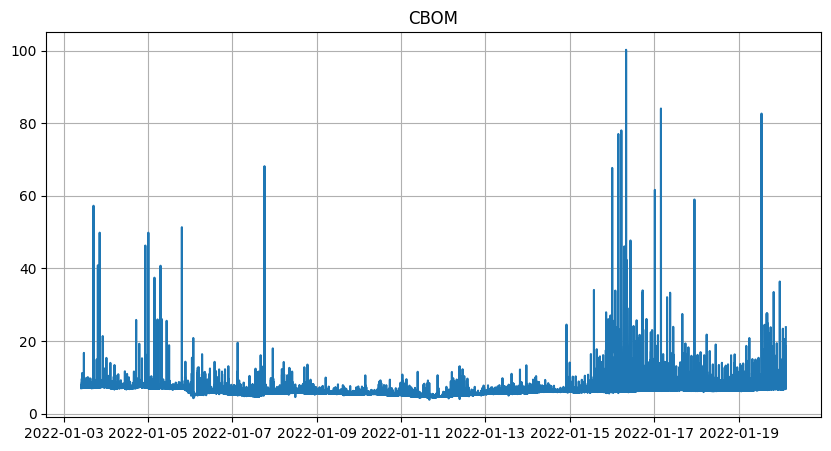

In [123]:
ts.plot(segments=["CBOM"])

In [124]:
from etna.transforms import DensityOutliersTransform, TimeSeriesImputerTransform, LinearTrendTransform, TrendTransform, \
    LagTransform, DateFlagsTransform, FourierTransform, SegmentEncoderTransform, MeanTransform

# Prepare transforms
transforms = [
    DensityOutliersTransform(in_column="target", distance_coef=3.0),
    TimeSeriesImputerTransform(in_column="target", strategy="forward_fill"),
    LinearTrendTransform(in_column="target"),
    TrendTransform(in_column="target", out_column="trend"),
    LagTransform(in_column="target", lags=list(range(HORIZON, 122)), out_column="target_lag"),
    DateFlagsTransform(week_number_in_month=True, out_column="date_flag"),
    FourierTransform(period=360.25, order=6, out_column="fourier"),
    SegmentEncoderTransform(),
    MeanTransform(in_column=f"target_lag_{HORIZON}", window=12, seasonality=7),
    MeanTransform(in_column=f"target_lag_{HORIZON}", window=7),
]

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (/Users/valentin/anaconda3/envs/conda_go_algo_3_10_new/lib/python3.10/site-packages/sklearn/base.py)

In [ ]:
from etna.models import CatBoostMultiSegmentModel
from etna.pipeline import Pipeline
model = CatBoostMultiSegmentModel()

# Create and fit the pipeline
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
pipeline.fit(train_ts)

# Make a forecast
forecast_ts = pipeline.forecast()

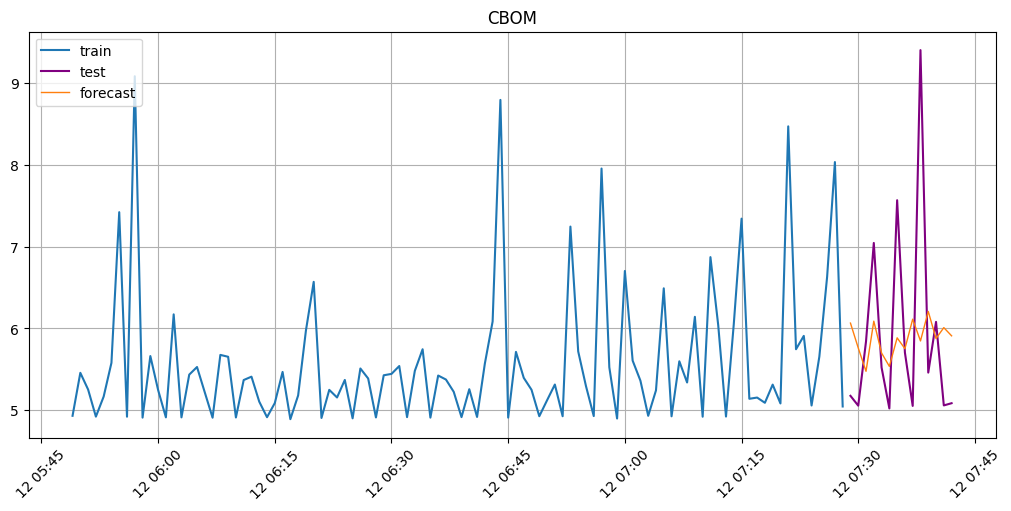

In [19]:
from etna.analysis import plot_forecast

plot_forecast(forecast_ts=forecast_ts , test_ts=test_ts, train_ts=train_ts, n_train_samples=100,  prediction_intervals=True)

In [20]:
from etna.metrics import MAE, MSE, SMAPE

In [21]:
# pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()], n_folds=3, mode="expand")

In [31]:
import warnings

warnings.filterwarnings("ignore")

In [32]:
metrics_df, forecast_df, fold_info_df  = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()], n_folds=4, mode="expand", n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   47.4s remaining:   47.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 8 concurrent workers.
/Users/valentin/anaconda3/envs/Go_Algo_3_10/lib/python3.10/site-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s
/Users/valentin/anaconda3/envs/Go_Algo_3_10/lib/python3.10/site-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(
/Users/valentin/anaconda3/envs/Go_Algo_3_10/lib/python3.10/site-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `cl

KeyboardInterrupt: 

In [ ]:
from etna.analysis import plot_backtest

plot_backtest(forecast_df, ts)

In [ ]:
metrics_df.head(126)

In [ ]:
from etna.analysis import metric_per_segment_distribution_plot

metric_per_segment_distribution_plot(metrics_df=metrics_df, metric_name="SMAPE", plot_type="box")

In [ ]:
from etna.analysis import plot_residuals

plot_residuals(forecast_df=forecast_df, ts=ts)

In [ ]:
from etna.analysis import prediction_actual_scatter_plot

prediction_actual_scatter_plot(forecast_df=forecast_df, ts=ts)

In [ ]:
forecast_ts.to_pandas(True)[['timestamp','segment','target']]

In [ ]:
forecast_ts.head()

In [ ]:
test_ts

In [ ]:
from moexalgo import Ticker

In [ ]:
from datetime import date

DATE_START = date(2023, 10, 1)
DATE_END = date(2023, 10, 2)

In [ ]:
tiket = Ticker('AFKS')
type(tiket.orderstats(date=DATE_START, till_date=DATE_END))


In [ ]:
type(tiket.tradestats(date=DATE_START, till_date=DATE_END))


In [ ]:
type(tiket.obstats(date=DATE_START, till_date=DATE_END))

In [ ]:
tradestats = tiket.tradestats(date=DATE_START, till_date=DATE_END)

In [ ]:
tradestats.info()

In [ ]:
len(tradestats['tradetime'].unique().tolist())

In [ ]:
tiket.obstats(date=DATE_START, till_date=DATE_END).head()

In [ ]:
tiket_random = 'APTK'

In [ ]:
tradestats[tradestats['ticker'] == tiket_random].sort_values(by='tradedate', ascending=True)

In [ ]:
import pandas as pd

In [ ]:
tradestats.loc[:, 'trade_datetime'] = pd.to_datetime(
        tradestats.tradedate.astype(str) + ' ' + tradestats.tradetime.astype(str))

In [ ]:
tradestats.head()

In [ ]:
tradestats.tradedate.astype(str) + ' ' + tradestats.tradetime.astype(str)

In [ ]:
tradestats['trade_datetime'] = pd.to_datetime(tradestats.tradedate.astype(str) + ' ' + tradestats.tradetime.astype(str))

In [ ]:
tradestats.head()

In [ ]:
from moexalgo import Ticker

In [ ]:
tiket = Ticker('APTK') #tiket_random = 'APTK'

In [ ]:
type()

In [ ]:
!python --version 

In [ ]:
df = pd.read_csv('data/obstats_2020.csv', sep=';')
df.head()

In [ ]:
df['tradedate']= pd.to_datetime(df['tradedate'])

df.info()

In [ ]:
df = df[df['tradedate'] >= DATE_START]

In [ ]:
print(DATE_START)

In [ ]:
from datetime import datetime



In [ ]:
df.loc[(df['tradedate'] > datetime.strptime('2023-10-01', '%Y-%m-%d'))].head()

In [ ]:
import pandas as pd

from moexalgo import Ticker
from settings import DATE_START, DATE_END

tiket = Ticker('ALRS')
tradestats = pd.DataFrame(tiket.tradestats(date=DATE_START, till_date=DATE_END))

print(tradestats.head())

In [ ]:
pd.read_csv('df_after.csv', sep=';').info()

In [ ]:
pd.read_csv('df_before.csv', sep=';').info()

In [ ]:
from scipy.signal import medfilt
import numpy as np

# Пример применения медианного фильтра для снижения шума
noisy_data = np.random.random(100)  # Пример шумных данных
smoothed_data = medfilt(noisy_data, kernel_size=3)

In [ ]:
print(noisy_data)

In [ ]:
print(smoothed_data)